# Phase 4 Assessment Review

_January 20, 2021_

Agenda Today:
- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import seaborn as sns


import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline



Loading BokehJS ...

# Part I. PCA

- linearly independent (all PCs), each are not correlated to each other
- eigenvalue - amoutn of variability exxplained by each principal component
- eigenvector - direction of principal components, how much each feature to take to make a particular PC in terms of direction
- dimensionality reduction algo, doesn't reduce dimensions by default
- project original variables to a lower dimension by creating new characteristics called principal components
- PC are linear combinations of original features
- explains proportions of variability of original features
- standardized and scaling, lives off on covariance or else covariance will be calculuated in the original unit of measurement so that can be misleading

### What are some of the advantages using PCA? How does it help reduce dimensions?

- better visualize your data in lower dimensions
- helps with multicollinearity since they are linearly independent
- reduce complexity

In [4]:
# Import the mpg dataset and build pca
mpg = sns.load_dataset('mpg')
# what are some of the steps to build pca?
mpg_cont = mpg.iloc[:,:6]
# step 1 - standardize and scale
mpg_cont.dropna(axis = 0, inplace = True)
X = mpg_cont.drop("mpg", axis=1)
y = mpg_cont.mpg

In [5]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5


In [6]:
features = X.columns.to_list()
features

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [7]:
# step 2 fit our pca - and specify i only want the amount of components that explain 90% of the variance 
sc = StandardScaler()
X_sc = sc.fit_transform(X)
pca = PCA(n_components=0.90)

# fit the pca
# mpg_pca.fit(mpg_scaled)
pc = pca.fit_transform(X_sc)

## Principal Components

In [8]:
df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
target = pd.Series(mpg['mpg'], name='target')
result_df = pd.concat([df, target], axis=1)
result_df.head()

,PC1,PC2,target
0,2.242403,-0.479758,18.0
1,3.035319,-0.599310,15.0
2,2.622952,-0.872521,18.0
3,2.436430,-0.576210,16.0
4,2.493047,-1.024095,17.0


In [9]:
# check out how many components there are 
# create a screet plot
pca.explained_variance_

array([4.08227378, 0.69563583])

## Eigenvectors and Eigenvalues

In [10]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_ # 2
ls_1 = eig_vectors[0] * np.sqrt(eig_values[0])
ls_2 = eig_vectors[1] * np.sqrt(eig_values[1])
loading = pd.DataFrame(data = {'PC1 Eigenvalues': eig_vectors[0], 'PC2 Eigenvalues': eig_vectors[1], 'PC1 Loading Scores': ls_1, 'PC2 Loading Scores': ls_2}, index=features)
loading

,PC1 Eigenvalues,PC2 Eigenvalues,PC1 Loading Scores,PC2 Loading Scores
cylinders,0.468717,0.223479,0.947027,0.186392
displacement,0.482404,0.178630,0.974681,0.148986
horsepower,0.473844,-0.119989,0.957384,-0.100076
weight,0.461790,0.345286,0.933030,0.287985
acceleration,-0.331379,0.885736,-0.669539,0.738746


In [11]:
eig_vectors

array([[ 0.46871748,  0.4824044 ,  0.47384374,  0.46179021, -0.3313787 ],
       [ 0.2234786 ,  0.17862974, -0.11998855,  0.34528638,  0.8857363 ]])

In [12]:
# how much variance each comp is explaining
print("Amount of Explained Variance: ", np.sum(pca.explained_variance_ratio_))

Amount of Explained Variance:  0.9531442127544515


## Scree Plot

Text(0, 0.5, 'Proportion of explained variance')

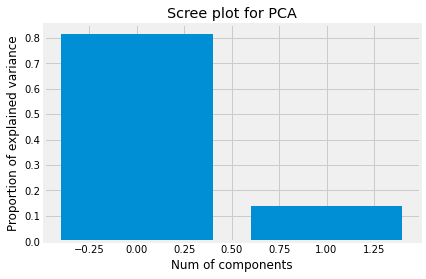

In [13]:
index = np.arange(2)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('Proportion of explained variance')

Text(0, 0.5, 'Cumulative Explained Variance')

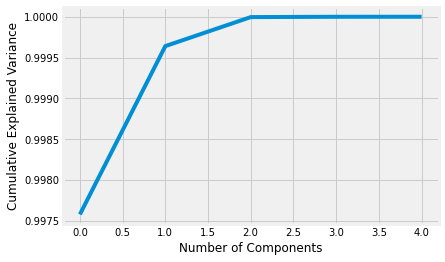

In [14]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [20]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X_sc)

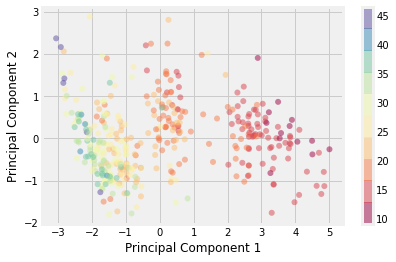

In [21]:
plt.scatter(pc[:, 0], pc[:, 1], c=mpg_cont.mpg, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Conponent 2')
plt.colorbar()

# Part II. Clustering


### Steps of K-Means Clustering:
    1. first we choose k, number of clusters we want to find in data, randomly
    2. in the Reassign Points step, we assign every point in the data to the cluster whose centroid is nearest to it
    3. in the Update Centroids step, we recalculate each centroid's location as the mean (center) of all the points assigned to its cluster
    4. we then iterate these steps until the centroids stop moving, or equivalently until points stop switching clusters.

### How to select the best value of k using those metrics?
    1. silhouette coefficient
        - how good the clusters are 
        - intercluster distance (ideally large) vs. intracluster distance (ideally small)
        - distance between / distance within
        - we want the difference to be large
        - standardized metric from 1 to -1 (good to bad)
    2. elbow method 
        - x-axis have k, y-axis have silhouette score
        - iterate throguh diffeerent values of k
        - for each k value, acquire silhouette score
        - make a graph of elbow method

Despite the fact that k-means is guaranteed to converge, the final cluster configuration to which it converges is not in general unique, and depends on the initial centroid locations. 
One final interesting property of k-means, though one that isn't much talked about, is that it is actually possible for no data points to be assigned to a cluster in the Reassign Points step. 
K-Means works best in datasets that have with clusters that are roughly equally-sized and shaped roughly regularly. 
So it works very well on the "Gaussian Mixture" data and the "Packed Circles" data if you the "Farthest" heuristic and the right number of centroids.

However, it is not able to capture the four different clusters of points in the "Smiley" and "Pimpled Smiley" datasets, due to the unusual shape of the face outline. 
The requirement of choosing k, and the dependence of the output on the initial cluster configuration, is also annoying. 
And k-means can only be applied when the data points lie in a Euclidean space, failing for more complex types of data
Despite these disadvantages, k-means algorithm is major workhorse in clustering analysis: works well on many realistic data sets, and relatively fast, easy to implement and understand
Many clustering algorithms that improve on or generalize k-means, such as k-medians, k-medoids, k-means++, and the EM algorithm for Gaussian mixtures, all reflect the same fundamental insight, that points in a cluster ought to be close to the center of that cluster.

           

In [158]:
# building a k-means clustering model - with 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# fit the kmeans


In [159]:
X.values

array([[   8. ,  307. ,  130. , 3504. ,   12. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5],
       [   8. ,  318. ,  150. , 3436. ,   11. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6],
       [   4. ,  120. ,   79. , 2625. ,   18.6],
       [   4. ,  119. ,   82. , 2720. ,   19.4]])

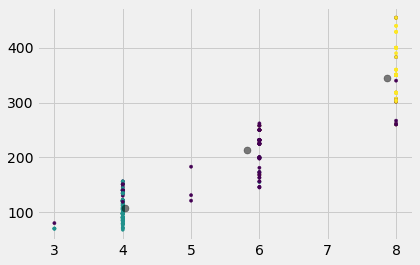

In [161]:
plt.scatter(X.values[:, 0], X.values[:, 1], c=y_pred, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=50, alpha=0.5)

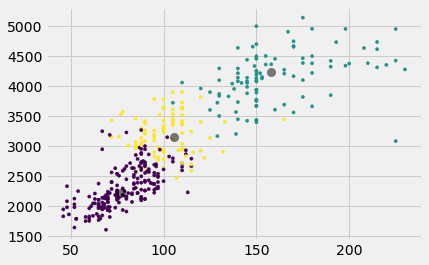

In [162]:
plt.scatter(X.values[:,2], X.values[:,3], c=predicted_clusters, s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,3], c='black', s=70, alpha=0.5)

In [21]:
# we can get the labels

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0,

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []
for i in range(2, 12):
    km = KMeans(n_clusters=i, random_state=42).fit(X)
    preds = km.predict(X)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X)))
    km_scores.append(-km.score(X))
    
    silhouette = silhouette_score(X,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -440.7690651460568
Silhouette score for number of cluster(s) 2: 0.6297421630890483
Davies Bouldin score for number of cluster(s) 2: 0.5030434150143028
V-measure score for number of cluster(s) 2: 0.19643928123196003
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -206.66113996472583
Silhouette score for number of cluster(s) 3: 0.5983343291339557
Davies Bouldin score for number of cluster(s) 3: 0.5683456602734528
V-measure score for number of cluster(s) 3: 0.2926980624139526
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -158.0318613552144
Silhouette score for number of cluster(s) 4: 0.572307021594523
Davies Bouldin score for number of cluster(s) 4: 0.7088786451609457
V-measure score for number of cluster(s) 4: 0.30081510961546387
----------------------------------------------------

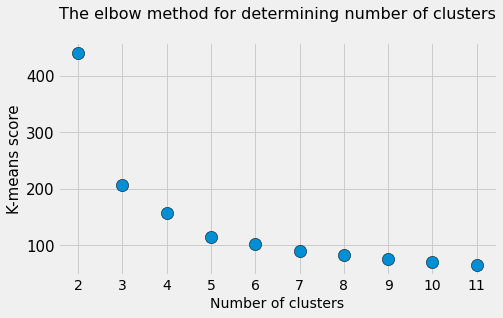

In [27]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

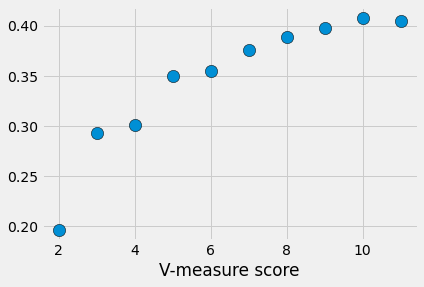

In [28]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

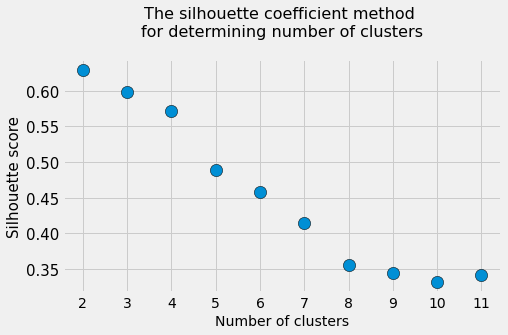

In [163]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

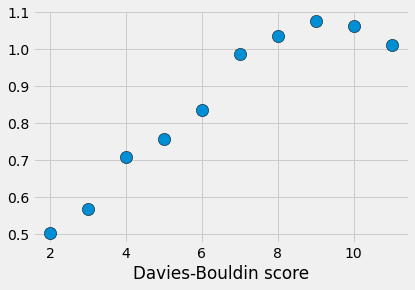

In [30]:

plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

# Part III. Natural Language Processing 
- What are some of the ways in which we can engineer features in NLP?
- What is TF-IDF, how is it calculated? What does it represent?

## TF-IDF Conceptual Understanding

- term frequency multiplified by how common term is in corpus
- TF = term frequency, how times token shows up in document (importance)
- IDF = inverse document frequency, take ratio of total number of documents / number of documents containing a token w and take the log of that (unique)
    - if w is unique and uncommon, IDF goes up, so high IDF value means more importance and more unique
    - if word is unique, w and denominator is smaller, ratio is larger, hence IDF is larger
    - if word is not unique, w and denominator is larger, ratio is smaller, hence IDF is smaller
    - log is to bring the range of values into more manageable balues
- TF/IDF 
    - harmonic measure of both of those things
    - high only if both are high
    - means that word is important and unique

In [31]:
# instantiate some data 
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."

labels = [0,1,1,0]
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df['label'] = labels

In [32]:
df.head()

,review,label
0,"6/10 Acting, not great but some good acting.<b...",0
1,Devil Hunter gained notoriety for the fact tha...,1
2,`Stanley and Iris' is a heart warming film abo...,1
3,"This may not be a memorable classic, but it is...",0


In [33]:
# define our x and y
X = df.review
y = df.label

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

docs = X
vec = CountVectorizer(stop_words=None)
X = vec.fit_transform(docs)
# use tfidf with unigrams and bigrams and remove stop words

df2 = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df2

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,4,1,2,0,0,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,1,1,1


In [44]:
feature_names = vec.get_feature_names()

In [45]:
# what are some of the steps to engineer the features?

# stop words removal
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

words_stopped = [word for word in tokens if word not in stopwords_list]

# what if you need to remove more stopwords than this collection?
# should use different set of stepwords

# use tfidf, with unigrams and bigrams, and remove stop words
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords)
# 1, 2 for unigram and bigram

## could you add some optional parameters to that?


`input: {‘filename’, ‘file’, ‘content’}, default=’content’`
- If ‘filename’, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.
- If ‘file’, the sequence items must have a ‘read’ method (file-like object) that is called to fetch the bytes in memory.
- Otherwise the input is expected to be a sequence of items that can be of type string or byte.

`encoding: str, default=’utf-8’`
- If bytes or files are given to analyze, this encoding is used to decode.

`decode_error: {‘strict’, ‘ignore’, ‘replace’}, default=’strict’`
- Instruction on what to do if a byte sequence is given to analyze that contains characters not of the given encoding. 
- By default, it is ‘strict’, meaning that a UnicodeDecodeError will be raised. Other values are ‘ignore’ and ‘replace’.

`strip_accents: {‘ascii’, ‘unicode’}, default=None`
- Remove accents and perform other character normalization during the preprocessing step. 
- ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. 
- ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.
- Both ‘ascii’ and ‘unicode’ use NFKD normalization from unicodedata.normalize.

`lowercase: bool, default=True`
- Convert all characters to lowercase before tokenizing.

`preprocessor: callable, default=None`
- Override the preprocessing (string transformation) stage while preserving the tokenizing and n-grams generation steps. 
- Only applies if analyzer is not callable.

`tokenizer: callable, default=None`
- Override the string tokenization step while preserving the preprocessing and n-grams generation steps.
- Only applies if analyzer == 'word'.

`analyzer: {‘word’, ‘char’, ‘char_wb’} or callable, default=’word’`
- Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.
- If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.
- Since v0.21, if input is filename or file, the data is first read from the file and then passed to the given callable analyzer.

`stop_words: {‘english’}, list, default=None`
- If a string, it is passed to _check_stop_list and the appropriate stop list is returned. ‘english’ is currently the only supported string value. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words).
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

`token_pattern: str, default=r”(?u)\b\w\w+\b”`
- Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'. 
- The default regexp selects tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).
- If there is a capturing group in token_pattern then the captured group content, not the entire match, becomes the token. At most one capturing group is permitted.

`ngram_range: tuple (min_n, max_n), default=(1, 1)`
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. 
- For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. 
- Only applies if analyzer is not callable.

`max_df: float or int, default=1.0`
- When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). 
- If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. 
- This parameter is ignored if vocabulary is not None.

`min_df: float or int, default=1`
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
- If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. 
- This parameter is ignored if vocabulary is not None.

`max_features: int, default=None`
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
- This parameter is ignored if vocabulary is not None.

`vocabulary: Mapping or iterable, default=None`
- Either a Mapping (e.g., a dict) where keys are terms and values are indices in the feature matrix, or an iterable over terms. 
- If not given, a vocabulary is determined from the input documents.

`binary: bool, default=False`
- If True, all non-zero term counts are set to 1. This does not mean outputs will have only 0/1 values, only that the tf term in tf-idf is binary. (Set idf and normalization to False to get 0/1 outputs).

`dtype: dtype, default=float64`
- Type of the matrix returned by fit_transform() or transform().

`norm: {‘l1’, ‘l2’}, default=’l2’
- Each output row will have unit norm, either: 
    - ‘l2’: Sum of squares of vector elements is 1. The cosine similarity between two vectors is their dot product when l2 norm has been applied. 
    - ‘l1’: Sum of absolute values of vector elements is 1. See preprocessing.normalize.

`use_idf: bool, default=True`
- Enable inverse-document-frequency reweighting.

`smooth_idf: bool, default=True`
- Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

`sublinear_tf: bool, default=False`
- Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

In [47]:
df2.head()

,10,30,50,able,about,abusive,acquainted,acting,actress,actually,...,worker,working,worth,would,write,writer,you,young,your,yuppie
0,4,1,2,0,0,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,1,1,1


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#ngram_range allows us to check for any range on n-grams, can also give stop works and a tokenizer
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['review'])
text_counts

<4x275 sparse matrix of type '<class 'numpy.int64'>'
	with 308 stored elements in Compressed Sparse Row format>

**Interpretation of TFIDF** 

What does a high value of TFIDF tell you about a certain word?

In [49]:
# step 1 - train test split
X = df.review
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# step 2 - tokenize and feature engineer using tfidf
train_features = tfidf.fit_transform(X_train)
test_features = tfidf.transform(X_test)

# step 3 - fit the model to the training set, test the model on the testing set
classifier = RandomForestClassifier()
classifier.fit(train_features, y_train)

# step 4 - output prediction on testing set, compare true labels to predicted labels, get accuracy
pred = classifier.predict(test_features)

In [41]:
pd.DataFrame(train_features.todense())

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,0.000000,0.000000,0.000000,0.000000,0.054559,0.054559,0.000000,0.054559,0.032223,0.054559,...,0.054559,0.054559,0.041493,0.000000,0.000000,0.000000,0.041493,0.054559,0.041493,0.054559
1,0.261535,0.065384,0.130767,0.000000,0.000000,0.000000,0.130767,0.000000,0.038617,0.000000,...,0.000000,0.000000,0.000000,0.065384,0.000000,0.065384,0.049726,0.000000,0.049726,0.000000
2,0.000000,0.000000,0.000000,0.080992,0.000000,0.000000,0.000000,0.000000,0.047835,0.000000,...,0.000000,0.000000,0.061596,0.000000,0.080992,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.0

## NTLK Processing

In [1]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

In [45]:
f = open('data/austen-emma.txt')
raw = f.read()
print(len(raw))
raw[:75]

887071


'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome,'

In [58]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokens_raw = nltk.regexp_tokenize(raw, pattern)
tokens = [word.lower() for word in tokens_raw]

## Removing Stop Words and Punctuation

In [70]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

words_stopped = [word for word in tokens if word not in stopwords_list]

In [72]:
words_stopped[:20]

['emma',
 'jane',
 'austen',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessings',
 'existence',
 'lived']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit_transform()

## Part IV. Time Series

In [51]:
ts = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [52]:
ts.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [53]:
# convert the date to datetime 
ts.Date = pd.to_datetime(ts.Date)

# your code below



In [54]:
# set the index to date
ts.set_index('Date', inplace=True)

- White Noise Model:
    - true stationary process, like monthly NYS returns
    - 3 properties:
        1. fixed and constant mean
        2. fixed and constant variance
        3. no correlation over time
- Random Walk Model:
    - no specified mean or variance
    - strong dependence over time
    - exchange rates

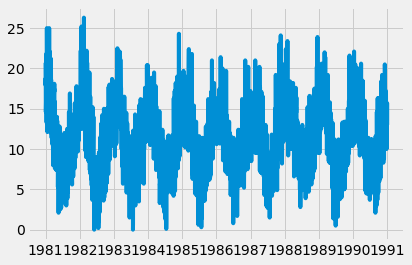

In [57]:
# visualize the daily temperature 
#visualize the daily temperature 
plt.plot(ts['Temp'])

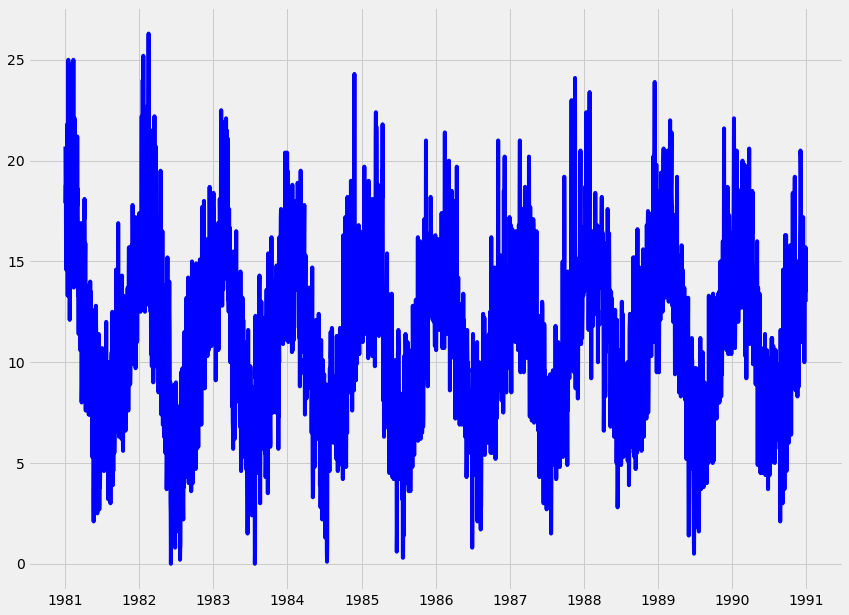

In [58]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(ts['Temp'], color='blue',label='daily opening stock price')

In [59]:
# get only the monthly mean 
monthly = ts.resample('M').mean()

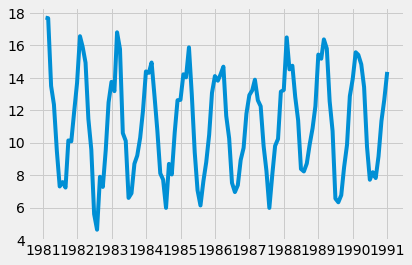

In [62]:
# visualize monthly mean
plt.plot(monthly['Temp'])

- is there stationarity in the monthly mean?
    - assumption that model has constant mean and variance and covariance

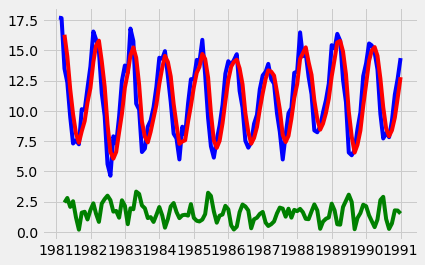

In [63]:
# get the rrolling mean, rolling standard deviation, and visualize all three of them together
roll_mean = monthly.rolling(window = 3).mean()
roll_std = monthly.rolling(window = 3).std()
plt.plot(monthly['Temp'], color = 'blue')
plt.plot(roll_mean, color = 'red')
plt.plot(roll_std, color = 'green')


- rolling mean and std
    - every three days we calculate a mean or standard deviation, it's a smoothing method
    - optional parameter of how many days in the window

In [64]:
# do a dickey fuller test to find out whether our dataset is stationary or not
from statsmodels.tsa.stattools import adfuller
test = adfuller(monthly['Temp'])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -1.892313
p-value                          0.335686
#Lags Used                      13.000000
Number of Observations Used    106.000000
dtype: float64


- what are some of the assumptions of using arima model? 
- does our dataset satisfy this assumption?
    - equal interval of observations
    - stationarity: constant mean, variance, covariance
- what kind of test can you use to find out?
- null hypothesis is there is no stationarity
    - we want to reject the null hypothesis since p-value is greater than .05
    - p value is too high, and our data does not have stationarity
- looks like it has stationarity, but according to the DF test there isn't stationarity

In [1]:
t = pd.read_csv('data/global_surface_temperature_anomalies.csv')
e = pd.read_csv('data/global_co2_emissions_per_capita.csv')
s = pd.read_csv("")

NameError: name 'pd' is not defined

In [8]:
t.head()

,date,Avg_Anomaly_deg_C
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.19
4,1880-05-31,-0.11


In [9]:
e.head()

,date,Global CO2 Emissions per Capita
0,1960-12-31,3.099013
1,1961-12-31,3.069727
2,1962-12-31,3.140511
3,1963-12-31,3.244499
4,1964-12-31,3.360596


In [13]:
import datetime

In [14]:
t.date = pd.to_datetime(t.date)
e.date = pd.to_datetime(e.date)
t.set_index('date', inplace=True)
e.set_index('date', inplace=True)

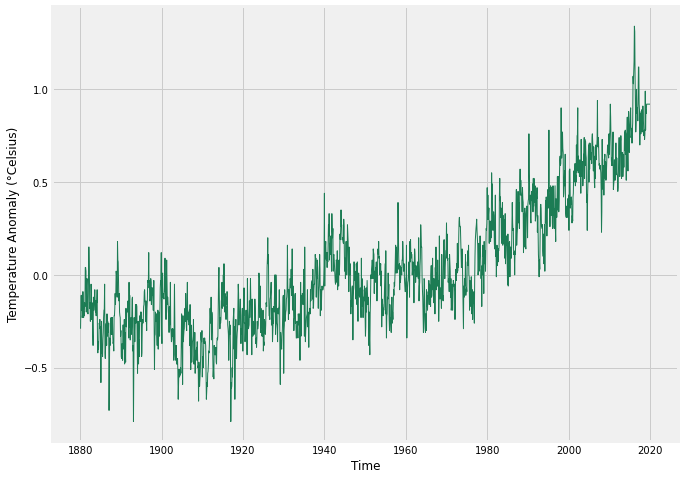

In [23]:
# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

In [36]:
t_mean = t.resample('A').mean()
t_mean.head()

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.185000
1881-12-31,-0.095000
1882-12-31,-0.101667
1883-12-31,-0.185000
1884-12-31,-0.288333


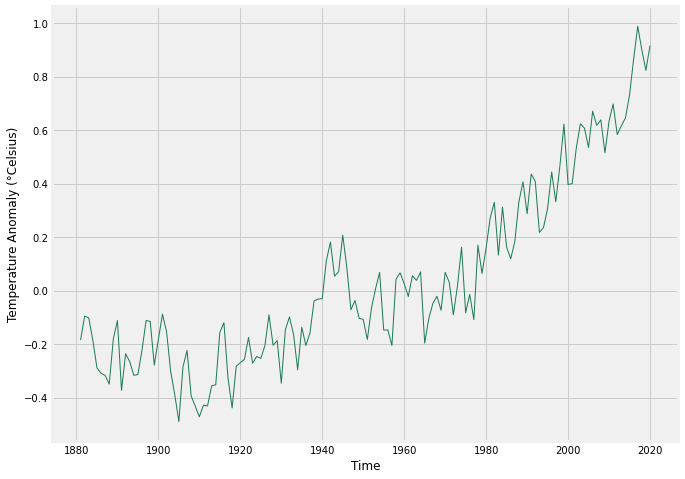

In [25]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='#1C7C54', linewidth=1.0)

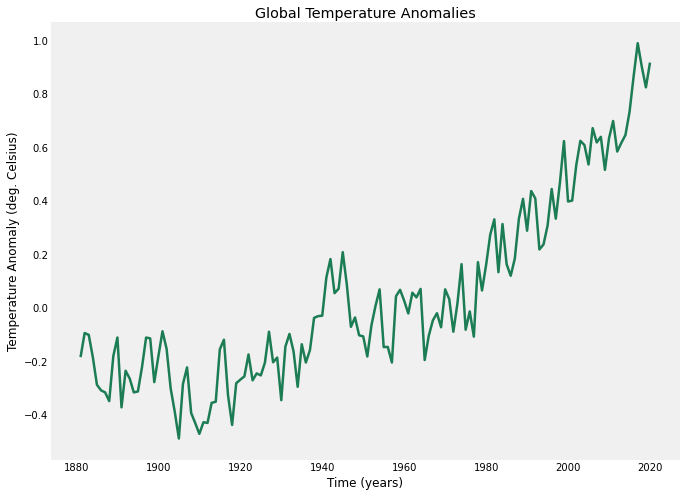

In [26]:
t_resampled = t.resample('A').mean()
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')
ax.grid()


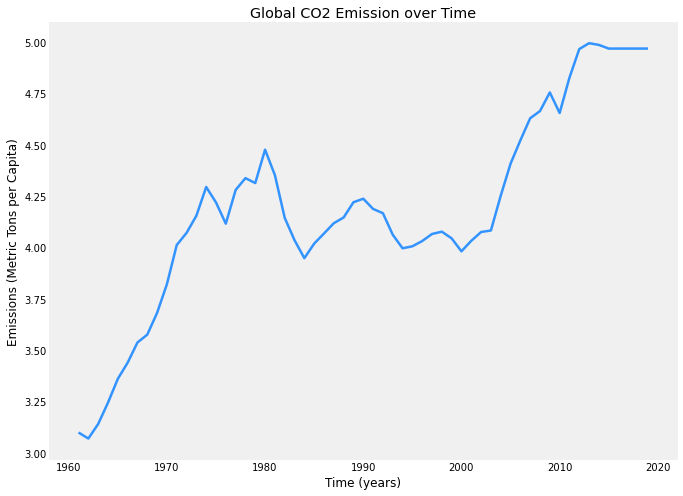

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(e, color='#3393FF', linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')
ax.grid()

In [32]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mod
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [33]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')

In [34]:
e.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')

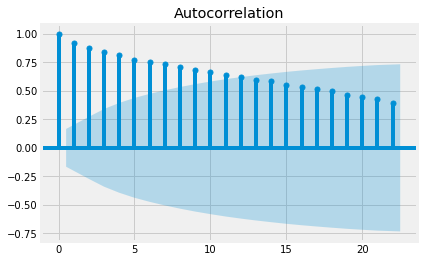

In [40]:
import statsmodels.api as sm

_ = sm.graphics.tsa.plot_acf(t_mean)
plt.show()


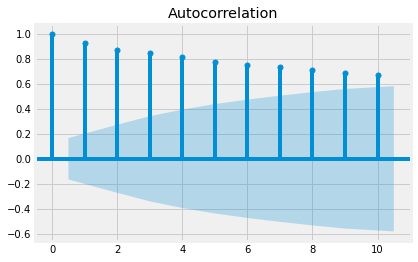

In [41]:
_ = sm.graphics.tsa.plot_acf(t_mean, lags=10)

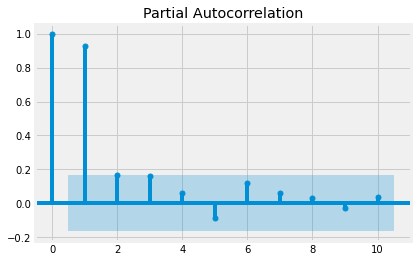

In [42]:
_ = sm.graphics.tsa.plot_pacf(t_mean, lags=10)